<center><h1>Murli_Sharan_Project</h1></center>
<br>
<center><h3 size="3">DSML PROJECT</h3></center>
<center><h3 size="3">Text Classification</h3></center>


<br>
<center><h5>Name: Sharan Murli</h5></center>
<center><h5>USC ID: 5232838315</h5></center>
<center><h5>Github Username: sharanmurli</h5></center>

<h3>Q1. Text Classification</h3>

<h3>It is highly recommended that you complete this project using Keras and Python</h3>

In [1]:
#installing the necessary libraries for the project
!pip install tensorflow

In [2]:
#Importing all the libraries required for this project
import pandas as pd
import numpy as np
import os
import string
import re
import math
os.environ['PYTHONWARNINGS'] = 'ignore'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D, LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import warnings 
from tqdm.notebook import tqdm
from tensorflow.keras.optimizers import Adam
warnings. filterwarnings('ignore')
print("Imported dependencies.")

Imported dependencies.


<h3>Q1 (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.</h3>

<h3>Q1 (b) Data Exploration and Pre-processing</h3>

<h3>Q1 (b) i. You can use binary encoding for the sentiments , i.e y=1 for positive sentiments and y = −1 for negative sentiments</h3>

<h3>Q1 (b) ii. The data are pretty clean. Remove the punctuation and numbers from the data.</h3>

In [3]:
#reading the directory and the folders : pos and neg
main_file_directory = '../Data'
positive_review_directory = os.path.join(main_file_directory, 'pos')
negative_review_directory = os.path.join(main_file_directory, 'neg')

def data_exploration(directory, sentiment):
    data_list = [open(os.path.join(directory, filename), encoding='utf-8').read() 
                 for filename in sorted(os.listdir(directory)) if filename.endswith('.txt')]
    labels_list = [sentiment] * len(data_list)
    return data_list, labels_list


positive_data, positive_labels = data_exploration(positive_review_directory, 1)
negative_data, negative_labels = data_exploration(negative_review_directory, -1)

In [4]:
#code for removing punctuation marks and numbers from the data
def data_cleaning(text):
    return re.sub(r'\d+|[^\w\s]', '', text)
print("Data cleaning is performed by removing punctuation and numbers.")

Data cleaning is performed by removing punctuation and numbers.


In [5]:
#printing the sample data
def print_sample_data(data, labels, num_samples=2):
    for i in range(num_samples):
        print(f"Review {i+1} (Label: {labels[i]}):\n{data[i]}\n")

print("Positive Reviews Samples:")
print_sample_data(positive_data, positive_labels)

print("\nNegative Reviews Samples:")
print_sample_data(negative_data, negative_labels)

Positive Reviews Samples:
Review 1 (Label: 1):
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the 

<h3>Q1 (b) iii. The name of each text file starts with cv_number. Use text files 0-699 in each class for training and 700-999 for testing</h3>

In [6]:
texts_data = positive_data + negative_data
labels_data = np.array(positive_labels + negative_labels)

#splitting data to training andtesting sets
x_train = positive_data[:700] + negative_data[:700]
y_train = np.array(positive_labels[:700] + negative_labels[:700])
x_test = positive_data[700:1000] + negative_data[700:1000]
y_test = np.array(positive_labels[700:1000] + negative_labels[700:1000])

x_train = [data_cleaning(doc) for doc in x_train]
x_test = [data_cleaning(doc) for doc in x_test]

# x_train
# x_test
# print("Dimensions :", len(x_train))
# print("Dimensions :", len(x_test))
# print("Dimensions :", len(y_train))
# print("Dimensions :", len(y_test))


<h3>Q1 (b) iv. Count the number of unique words in the whole dataset (train + test) and print it out</h3>

In [7]:
words_train = ' '.join(x_train).split()
word_counts_train = Counter(words_train)
unique_words_train = len(word_counts_train)

words_test = ' '.join(x_test).split()
word_counts_test = Counter(words_test)
unique_words_test = len(word_counts_test)

print("Number of unique words in the training set:", unique_words_train)
print("Number of unique words in the testing set:", unique_words_test)
all_texts = x_train + x_test
all_words = ' '.join(all_texts).split()
word_counts = Counter(all_words)
unique_words = len(word_counts)

print("Number of unique words in the whole dataset:", unique_words)

Number of unique words in the training set: 39765
Number of unique words in the testing set: 26745
Number of unique words in the whole dataset: 47037


<h3>Q1 (b) v. Calculate the average review length and the standard deviation of review lengths. Report the results</h3>

In [8]:
average_length = np.mean([len(doc.split()) for doc in all_texts])
std_dev_length = np.std([len(doc.split()) for doc in all_texts])
print("Statistics:\n")
print("======================================================================\n")
print("Average review length:", round(average_length,3))
print("Standard deviation of review lengths:", round(std_dev_length,3))

Statistics:


Average review length: 644.358
Standard deviation of review lengths: 284.98


<h3>Q1 (b) vi. Plot the histogram of review lengths</h3>

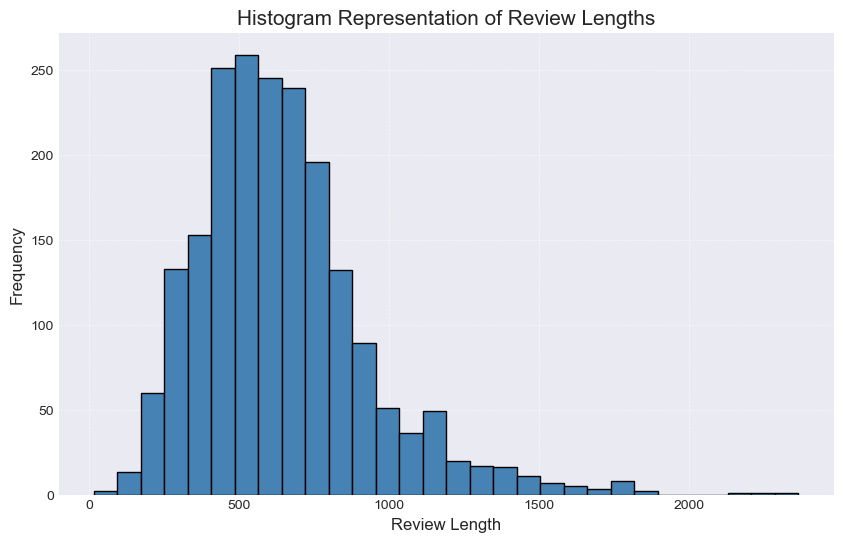

In [9]:
lengths = [len(doc.split()) for doc in all_texts]

#Reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.style.use('seaborn-darkgrid')  
plt.figure(figsize=(10, 6)) 
plt.hist(lengths, bins=30, color='steelblue', edgecolor='black')  
plt.title('Histogram Representation of Review Lengths', fontsize=15)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

<h3>Q1 (b) vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method</h3>

In [10]:
tokenizer = Tokenizer()  
tokenizer.fit_on_texts(all_texts)
sequences = tokenizer.texts_to_sequences(all_texts)
word_index = tokenizer.word_index

print("\nWord Index: Displaying the first 20 Tokenized words")
for word, index in list(word_index.items())[:20]:  # Show the first 10 entries, adjust as needed
    print(f"{word}: {index}")

#  Check the overall vocabulary size
# print("\nVocabulary Size:", len(word_index))


Word Index: Displaying the first 20 Tokenized words
the: 1
a: 2
and: 3
of: 4
to: 5
is: 6
in: 7
that: 8
it: 9
as: 10
with: 11
for: 12
his: 13
this: 14
film: 15
but: 16
he: 17
i: 18
on: 19
are: 20


<h3>Q1 (b) viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.</h3>

In [11]:
lengths = [len(sequence) for sequence in sequences]
L = int(np.percentile(lengths, 70)) 

print(f"Review length L that 70% of the reviews have a length below it: {L}")

Review length L that 70% of the reviews have a length below it: 737


<h3>Q1 (b) ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L</h3>

In [12]:
x_train_seq = pad_sequences(sequences[:1400], maxlen=L, padding='post', truncating='post')
x_test_seq = pad_sequences(sequences[1400:], maxlen=L, padding='post', truncating='post')

sequence_lengths = [len(seq) for seq in sequences]

print("Some truncated sequences from training data:")
for i, seq in enumerate(x_train_seq[:1]):
    print(f"Sequence {i+1}: {seq}")

print("\nSome truncated sequences from testing data:")
for i, seq in enumerate(x_test_seq[:1]):
    print(f"Sequence {i+1}: {seq}")

Some truncated sequences from training data:
Sequence 1: [   67  2745    29   355  1634    32    90  1047     4   627   628   321
    40  7660   704  4783  1755    47  7257  1328   396  4949    47     1
 10837  1777  1778   148    16   140   108    89    68     2   355   405
    39    29   503   142    12  9974     9    31   853    21  1352  1802
     3   944  1512    28   879     1  3951     5     2   282   113   540
     7     1  7258   126    11     2   202   262   381     1 27315     5
   180  1802     3  1512  1882 27316     1   845     4   495     1 13221
    69    22    39   820   325  1231     6  2142     5   175     2    94
  1232     1   405    47  1549   523    51    35    65     6   111  4950
   196     3  1233   440    42     8  9266     4   181    16 20915     7
    73   637   119  6914    14    15    84     4    23  2110    51    35
    64    74   403     1   282   355   405   179    35   228   188   124
  6595  2808     7    29 11930   880  2858     3  1029  2592   333 

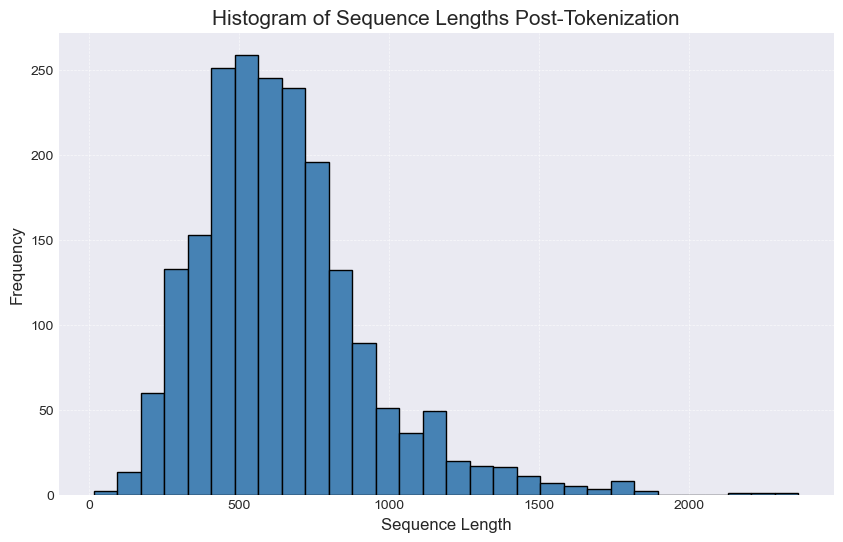

In [13]:
#Reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.style.use('seaborn-darkgrid') 
plt.figure(figsize=(10, 6)) 
plt.hist(sequence_lengths, bins=30, color='steelblue', edgecolor='black')  
plt.title('Histogram of Sequence Lengths Post-Tokenization', fontsize=15)
plt.xlabel('Sequence Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

<h3>Q1 (c). Word Embeddings</h3>

<h3>Q1 (c) i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”. Most deep learning modules (including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document. If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32×L matrix</h3>

<h3>Q1 (c) ii. Flatten the matrix of each document to a vector</h3>

In [14]:
#Reference: https://keras.io/api/keras_nlp/tokenizers/tokenizer/
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(all_texts)
sequences = tokenizer.texts_to_sequences(all_texts)
word_index = tokenizer.word_index


lengths = [len(sequence) for sequence in sequences]
L = int(np.percentile(lengths, 70)) 

print(f"Chosen length L: {L}")

x_train_seq = pad_sequences(sequences[:1400], maxlen=L, padding='post', truncating='post')
x_test_seq = pad_sequences(sequences[1400:], maxlen=L, padding='post', truncating='post')

Chosen length L: 651


<h3>NOTE: I am using 0 and 1 for the labels in my model because the sigmoid activation function in the final layer produces values between 0 and 1. This matches the output range of the function with the label range, making it easy to understand the output as the likelihood of the instance being in the positive class (1). This alignment not only makes the model simpler but also improves how well it can be understood and how effectively it performs in binary classification tasks.</h3>

In [15]:
y_train = (np.array(y_train) + 1) // 2  
y_test = (np.array(y_test) + 1) // 2

vocab_size = 5000 
embedding_dim = 32
max_length = L  

model_embedding = Sequential()
model_embedding.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_embedding.add(Flatten())
model_embedding.add(Dense(10, activation='relu'))
model_embedding.add(Dense(1, activation='sigmoid'))
model_embedding.build(input_shape=(None, max_length))
model_embedding.summary()
model_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_embedding.fit(x_train_seq, y_train, epochs=2, batch_size=10, validation_data=(x_test_seq, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 651, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20832)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         208,330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 368,341 (1.41 MB)

 Trainable params: 368,341 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5439 - loss: 0.6897 - val_accuracy: 0.5633 - val_loss: 0.7648
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8308 - loss: 0.4366 - val_accuracy: 0.7067 - val_loss: 0.5783


In [16]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

test_loss, test_acc = model_embedding.evaluate(x_test_seq, y_test, verbose=0)

results = pd.DataFrame({
    "Metric": ["Accuracy", "Loss"],
    "Training": [f"{train_acc[-1]*100:.2f}%", f"{train_loss[-1]:.4f}"],
    "Validation": [f"{val_acc[-1]*100:.2f}%", f"{val_loss[-1]:.4f}"],
    "Testing": [f"{test_acc*100:.2f}%", f"{test_loss:.4f}"]
})

display(results)

,Metric,Training,Validation,Testing
0,Accuracy,85.07%,70.67%,70.67%
1,Loss,0.3593,0.5783,0.5783


<h3>Q1 (d) Multi-Layer Perceptron</h3>

<h3>Q1 (d) i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10</h3>

In [17]:
#defining the parameters
vocab_size = 5000
embedding_dim = 32
max_length = 651 

expected_flattened_size = max_length * embedding_dim
print(f"Expected Flattened Size for observation purposes: {expected_flattened_size}")  

mlp_model = Sequential()
mlp_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
mlp_model.add(Flatten())
mlp_model.add(Dense(50, activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(50, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(50, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.build(input_shape=(None, max_length))
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

Expected Flattened Size for observation purposes: 20832


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 651, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20832)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │       1,041,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,206,801 (4.60 MB)

 Trainable params: 1,206,801 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = mlp_model.fit(x_train_seq, y_train, epochs=2, batch_size=10, validation_data=(x_test_seq, y_test))

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5251 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6220 - loss: 0.6581 - val_accuracy: 0.5567 - val_loss: 0.6878


<h3>Q1 (d) ii. Report the train and test accuracies of this model.</h3>

In [19]:
#Referred by chatgpt : How to display the training and testing accuracies in keras tenserflow in a table format dated: 05/03/2024
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

train_loss_eval, train_acc_eval = mlp_model.evaluate(x_train_seq, y_train, verbose=0)
test_loss, test_acc = mlp_model.evaluate(x_test_seq, y_test, verbose=0)

results = pd.DataFrame({
    "Metric": ["Accuracy", "Loss"],
    "Training": [f"{train_acc:.2f}%", f"{train_loss:.4f}"],
    "Validation": [f"{val_acc:.2f}%", f"{val_loss:.4f}"],
    "Testing": [f"{test_acc*100:.2f}%", f"{test_loss:.4f}"]
})

display(results)

,Metric,Training,Validation,Testing
0,Accuracy,62.93%,55.67%,55.67%
1,Loss,0.6462,0.6878,0.6878


<h3>Q1 (e) One-Dimensional Convolutional Neural Network</h3>

<h3>Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.</h3>

<h3>Q1 (e) i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.</h3>

In [20]:
#defining the parameters
#Reference from https://keras.io/api/layers/convolution_layers/convolution1d/ for defining the hyper parameters
vocab_size = 5000 
embedding_dim = 32
max_length = 651  
conv_model = Sequential()
conv_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
conv_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
conv_model.add(MaxPooling1D(pool_size=2))
conv_model.add(Flatten())
# conv_model.add(Dense(50, activation='relu'))
# conv_model.add(Dropout(0.5))
# conv_model.add(Dense(50, activation='relu'))
# conv_model.add(Dropout(0.5))
conv_model.add(Dense(1, activation='sigmoid'))
conv_model.build(input_shape=(None, max_length))  
conv_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
conv_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 651, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 649, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 324, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │          10,369 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,473 (677.63 KB)

 Trainable params: 173,473 (677.63 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = conv_model.fit(
    x_train_seq,
    y_train,
    epochs=2,
    batch_size=10,
    validation_data=(x_test_seq, y_test)
)

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4899 - loss: 0.6964 - val_accuracy: 0.5417 - val_loss: 0.6902
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6840 - loss: 0.6215 - val_accuracy: 0.6183 - val_loss: 0.6574


<h3>Q1 (e) ii. Report the train and test accuracies of this model.</h3>

In [22]:
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

train_loss_eval, train_acc_eval = conv_model.evaluate(x_train_seq, y_train, verbose=0)

test_loss, test_acc = conv_model.evaluate(x_test_seq, y_test, verbose=0)


results = pd.DataFrame({
    "Metric": ["Accuracy (%)", "Loss"],
    "Training": [f"{train_acc:.2f}", f"{train_loss:.4f}"],
    "Validation": [f"{val_acc:.2f}", f"{val_loss:.4f}"],
    "Testing": [f"{test_acc*100:.2f}", f"{test_loss:.4f}"]
})

display(results)

,Metric,Training,Validation,Testing
0,Accuracy (%),70.93,61.83,61.83
1,Loss,0.5953,0.6574,0.6574


<h3>Q1 (f) Long Short-Term Memory Recurrent Neural Network</h3>

<h3>The structure of the LSTM we are going to use is shown in the following figure</h3>

<h3>Q1 (f) i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10</h3>

In [23]:
#defining the parameters
vocab_size = 5000  
embedding_dim = 32  
max_length = 651 
dropout_rate = 0.2  

lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(256), 
    Dropout(dropout_rate), 
    Dense(256, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

lstm_model.build(input_shape=(None, max_length)) 
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 651, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521,985 (1.99 MB)

 Trainable params: 521,985 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = lstm_model.fit(
    x_train_seq, y_train,
    epochs=50, 
    batch_size=10,
    validation_data=(x_test_seq, y_test)
)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 80s 565ms/step - accuracy: 0.5128 - loss: 0.6981 - val_accuracy: 0.5483 - val_loss: 0.6877
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 77s 554ms/step - accuracy: 0.5528 - loss: 0.6804 - val_accuracy: 0.5467 - val_loss: 0.6904
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 85s 609ms/step - accuracy: 0.6186 - loss: 0.6305 - val_accuracy: 0.5400 - val_loss: 0.7579
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 91s 650ms/step - accuracy: 0.6403 - loss: 0.5687 - val_accuracy: 0.4717 - val_loss: 0.7846
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 88s 628ms/step - accuracy: 0.6515 - loss: 0.5181 - val_accuracy: 0.4650 - val_loss: 0.9217
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 85s 608ms/step - accuracy: 0.6695 - loss: 0.4830 - val_accuracy: 0.5183 - val_loss: 1.0361
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 87s 623ms/step - accuracy: 0.6786 - loss: 0.4897 - val_accuracy: 0.5200 - val_loss: 1.1127
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 90s 643ms/step - accuracy: 0.6639 - loss: 0

140/140 ━━━━━━━━━━━━━━━━━━━━ 92s 657ms/step - accuracy: 0.6727 - loss: 0.4791 - val_accuracy: 0.5317 - val_loss: 1.7595


<h3>Q1 (f) ii. Report the train and test accuracies of this model.</h3>

In [25]:
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

test_loss, test_accuracy = lstm_model.evaluate(x_test_seq, y_test, verbose=0)
test_acc = test_accuracy * 100

results = pd.DataFrame({
    "Metric": ["Accuracy (%)", "Loss"],
    "Training": [f"{train_acc:.2f}", f"{train_loss:.4f}"],
    "Validation": [f"{val_acc:.2f}", f"{val_loss:.4f}"],
    "Testing": [f"{test_acc:.2f}", f"{test_loss:.4f}"]
})

display(results)

,Metric,Training,Validation,Testing
0,Accuracy (%),67.21,53.17,53.17
1,Loss,0.4802,1.7595,1.7595


<h3>Building models with 90% Review Lenth L for observation purposes:</h3>

<h3>consider 90% of review length L and build the MLP , CONV1D and LSTM Models</h3>

In [26]:
lengths = [len(sequence) for sequence in sequences]
L = int(np.percentile(lengths, 90)) 

print(f"Review length L that 70% of the reviews have a length below it: {L}")

Review length L that 70% of the reviews have a length below it: 883


<h4>90% review Length L : MLP Model</h4>

In [27]:
#MLP with 90% review length
#defining the parameters
vocab_size = 5000
embedding_dim = 32
max_length = 883 
x_train_seq_padded = pad_sequences(x_train_seq, maxlen=max_length, truncating='post', padding='post')
x_test_seq_padded = pad_sequences(x_test_seq, maxlen=max_length, truncating='post', padding='post')

expected_flattened_size = max_length * embedding_dim
print(f"Expected Flattened Size for observation purposes: {expected_flattened_size}")  

mlp_model_90 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
mlp_model_90.build(input_shape=(None, max_length)) 

mlp_model_90.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model_90.summary()


history = mlp_model_90.fit(x_train_seq_padded, y_train, epochs=2, batch_size=10, validation_data=(x_test_seq_padded, y_test))


Expected Flattened Size for observation purposes: 28256


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 883, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28256)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │       1,412,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,001 (6.02 MB)

 Trainable params: 1,578,001 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4751 - loss: 0.7054 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.4889 - loss: 0.7005 - val_accuracy: 0.4850 - val_loss: 0.6931


<h4>90% review Length L : CONV1D Model</h4>

In [28]:
#CONV1D Model with 90% review length
vocab_size = 5000 
embedding_dim = 32
max_length = 883  

tf.compat.v1.reset_default_graph()

conv_model_90 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
conv_model_90.build(input_shape=(None, max_length))
conv_model_90.summary()
conv_model_90.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 883, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 881, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 440, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 14080)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │          14,081 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,185 (692.13 KB)

 Trainable params: 177,185 (692.13 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = conv_model_90.fit(
    x_train_seq_padded,
    y_train,
    epochs=2,
    batch_size=10,
    validation_data=(x_test_seq_padded, y_test)
)

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5033 - loss: 0.6937 - val_accuracy: 0.5517 - val_loss: 0.6874
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7208 - loss: 0.6159 - val_accuracy: 0.5950 - val_loss: 0.6458


<h4>90% review Length L : LSTM Model</h4>

In [30]:
#LSTM with 90% review length
vocab_size = 5000  
embedding_dim = 32  
max_length = 883 
dropout_rate = 0.2  

lstm_model_90 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(256), 
    Dropout(dropout_rate), 
    Dense(256, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

lstm_model_90.build(input_shape=(None, max_length)) 
lstm_model_90.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model_90.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 883, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521,985 (1.99 MB)

 Trainable params: 521,985 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = lstm_model_90.fit(
    x_train_seq_padded, y_train,
    epochs=10, 
    batch_size=10,
    validation_data=(x_test_seq_padded, y_test)
)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 123s 873ms/step - accuracy: 0.5151 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 126s 900ms/step - accuracy: 0.4931 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 126s 901ms/step - accuracy: 0.5010 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 124s 886ms/step - accuracy: 0.4919 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 126s 901ms/step - accuracy: 0.4893 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 123s 882ms/step - accuracy: 0.5190 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 122s 871ms/step - accuracy: 0.4837 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 121s 867ms/step - accuracy: 0.4998 -

<h3>Statistics for All the Models in a table</h3>

In [34]:
data_stats = {
    "Model Type": ["MLP", "MLP", "MLP", "Conv1D", "Conv1D", "Conv1D" , "LSTM" , "LSTM" , "LSTM"],
    "Data Split": ["Training", "Validation", "Testing"] * 3,
    "Accuracy (%)": [62.93, 55.67, 55.67, 70.93, 61.83, 61.83 , 53.17 , 67.21 , 67.21],
    "Loss": [0.6088, 0.6462, 0.6878, 0.6878, 0.6574, 0.6574,0.4802, 1.7595 , 1.7595]
}
df = pd.DataFrame(data_stats)
print(df.to_string(index=False))

Model Type Data Split  Accuracy (%)   Loss
       MLP   Training         62.93 0.6088
       MLP Validation         55.67 0.6462
       MLP    Testing         55.67 0.6878
    Conv1D   Training         70.93 0.6878
    Conv1D Validation         61.83 0.6574
    Conv1D    Testing         61.83 0.6574
      LSTM   Training         53.17 0.4802
      LSTM Validation         67.21 1.7595
      LSTM    Testing         67.21 1.7595


In [35]:
!pip freeze > requirements.txt

<h3>References:<h3/>    
<hr>
<p><a>https://keras.io/api/models/model/</a></p>
<p><a>https://keras.io/api/models/sequential/</a></p>
<p><a>https://keras.io/api/layers/activations/</a></p>
<p><a>https://keras.io/api/layers/convolution_layers/convolution1d/</a></p>
<p><a>https://keras.io/api/layers/pooling_layers/max_pooling1d/</a></p>
<p><a>https://keras.io/api/layers/regularization_layers/dropout/</a></p>
<p><a>https://keras.io/api/layers/activation_layers/relu/+++</a></p>
<p><a>https://stackoverflow.com/questions/51175884/error-of-shape-using-conv1d-in-keras</a></p>
<p><a>https://stackoverflow.com/questions/52934764/keras-adaptive-max-pooling</a></p>
<p><a>https://keras.io/api/layers/recurrent_layers/lstm/</a></p>
<p><a>https://keras.io/api/layers/core_layers/embedding/</a></p>
<p><a>https://keras.io/api/optimizers/adam/</a></p>
    <p><a>https://www.w3schools.com/python/matplotlib_histograms.asp</a></p>
    <p><a>https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer</a></p>